In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Data Load
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
from collections import Counter
freq = Counter([np.argmax(label) for label in mnist.train.labels])
for k in range(0,10):
    print("label {0} : {1}개".format(k, freq[k]))

label 0 : 5444개
label 1 : 6179개
label 2 : 5470개
label 3 : 5638개
label 4 : 5307개
label 5 : 4987개
label 6 : 5417개
label 7 : 5715개
label 8 : 5389개
label 9 : 5454개


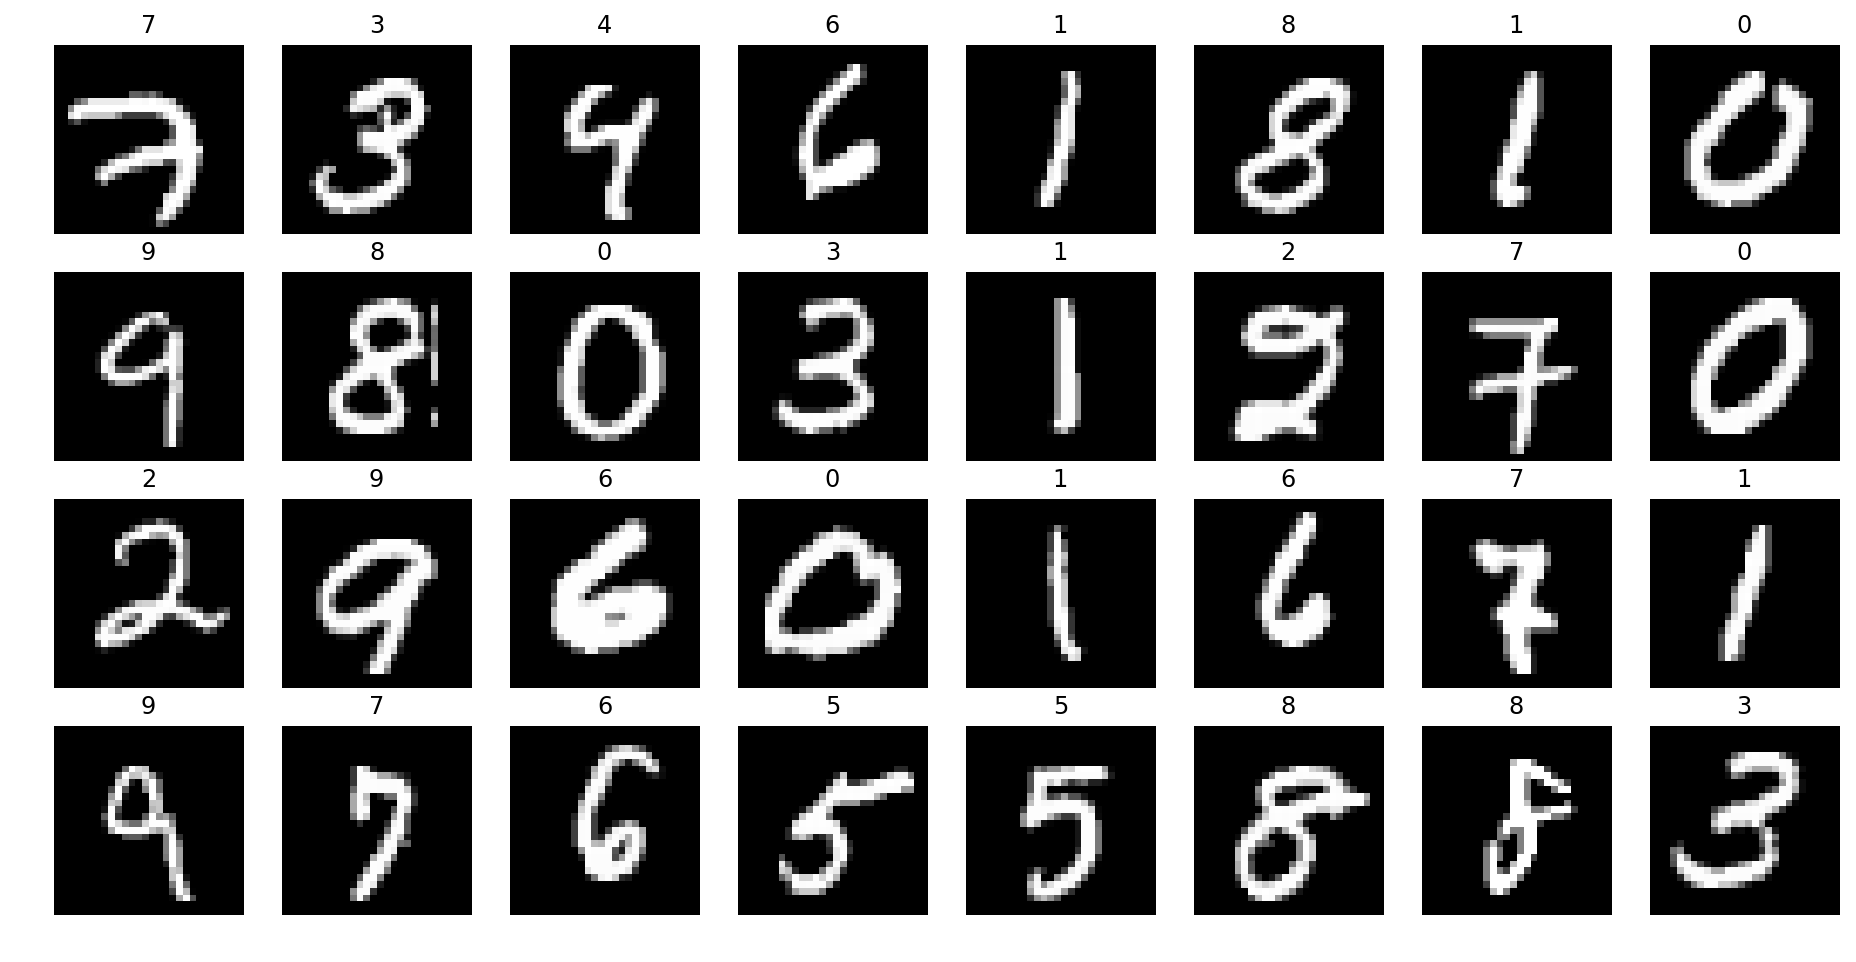

In [4]:
plt.figure(figsize=(16,8))
for k in range(32):
    img = mnist.train.images[k].reshape(28,28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

In [5]:
print("Min : {0}, Max : {1}".format(mnist.train.images[0].min(), mnist.train.images[0].max()))

Min : 0.0, Max : 0.9960784912109375


## Multi-label Classification
$$
\min_{W,b} \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})
$$
where $\hat{y_i^k} = softmax(x_i W + b)_k$

1. Forward Model : $\hat{y_i^k} = softmax(x_i W + b)_k$
1. Cross-Entropy : $\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})$



### 01. Model에 맞는 feature 정리
For $i=1,2,\cdots,m$,
$$
\texttt{features}_i = [\texttt{pixel}^i_1, \texttt{pixel}^i_2,\cdots, \texttt{pixel}^i_{784}]
$$

- TODO1 : mnist.train.images가 어떤 구조로 되어 있는지 파악하고, 위의 feature에 맞게 정리가 필요하다면 정리하세요.

In [6]:
# TODO1
print(mnist.train.images.shape)
features = mnist.train.images
labels = mnist.train.labels

(55000, 784)


### 02. Model TensorFlow로 정의하기

- TODO2 : `features`를 `feed`할 placeholder(`x`)를 정의
- TODO3 : Weight(`W`)와 bias(`b`)를 `Variable`로 초기값 0으로 정의
- TODO4 : Model(`model`) 정의

$$
\hat{y_i^k} = softmax(x_i W + b)_k
$$

In [7]:
# TODO2
x = tf.placeholder(tf.float32, [None, 784])

# TODO3
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# TODO4
model = tf.nn.softmax(tf.matmul(x, W) + b)

print(x.shape)
print(W.shape)
print(b.shape)
print(model)

(?, 784)
(784, 10)
(10,)
Tensor("Softmax:0", shape=(?, 10), dtype=float32)


### 03. Cross-Entropy 정의하기

- TODO5 : `labels`를 `feed`할 `placeholder`(`y`) 정의하기
- TODO6 : Corss-Entropy(`loss`) 정의하기 : `tf.

$$
\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{10} -y_i^k \log(\hat{y_i^k})
$$

In [17]:
# TODO6
y = tf.placeholder(tf.float32, [None, 10])

temp = -y * tf.log(model)
print(temp.shape)
# TODO7
a = tf.reduce_sum(-y * tf.log(model), 1)
print(a.shape)
b = tf.reduce_sum(-y * tf.log(model), 0)
print(b.shape)

loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model), 1))

print(loss)

(?, 10)
(?,)
(10,)
Tensor("Mean_3:0", shape=(), dtype=float32)


### 04. Gradient Descent에 사용할 Hyper-Parameter 설정(TODO 7) 
1. Optimizer : `AdamOptimizer`
1. `lerning rate` : `0.01`
1. `MaxEpoch` : `51`
1. Train Step

In [9]:
# TODO7
lr = 0.01
MaxEpochs = 51
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

In [10]:
# For testing accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 05. Gradient Descent

- TODO8 : batch 사용하지 않고 모든 features와 labels을 다 feed 해줍니다.

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    # TODO 8
    sess.run(train, feed_dict={x:features, y:labels})
    if epoch % 5 == 0:
        curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:features, y:labels})
        curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print(epoch, curr_loss, curr_acc)

0 1.8558574 0.6348
5 0.80009645 0.8198
10 0.55326843 0.8589
15 0.46292374 0.8762
20 0.4167734 0.8892
25 0.38736275 0.8961
30 0.36699802 0.9023
35 0.35173324 0.9057
40 0.34015206 0.9083
45 0.3308596 0.9108
50 0.32313168 0.9131


### 06. Stochastic Gradient Descent에 사용할 Hyper-Parameter 설정(TODO 9) 
1. Optimizer : `AdamOptimizer`
1. `batch_size` : `128`
1. `lerning rate` : `0.01`
1. `MaxEpoch` : `5`
1. Train Step

In [12]:
# TODO9
batch_size = 128
lr = 0.01
MaxEpochs = 5
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

### 07. Stochastic Gradient Descent(SGD)
- TODO10 : `mnist.train.next_batch()`사용하여 batch 생성하기
- TODO11 : batch만 사용하여, train 하기

In [13]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    # TODO 10
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # TODO 11
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 50 == 0:
            curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 2.0043077 0.3198
0 50 0.3796025 0.8988
0 100 0.3515591 0.9053
0 150 0.31575045 0.9141
0 200 0.32015142 0.9136
0 250 0.30470073 0.918
0 300 0.29997784 0.9128
0 350 0.2920497 0.9205
0 400 0.32386744 0.9066

1 0 0.3075782 0.9116
1 50 0.2814937 0.9197
1 100 0.29382217 0.9153
1 150 0.2828332 0.9184
1 200 0.27486345 0.9229
1 250 0.27116826 0.9207
1 300 0.2678397 0.9228
1 350 0.26729366 0.9217
1 400 0.2780169 0.9191

2 0 0.277979 0.9162
2 50 0.27285865 0.9233
2 100 0.2751899 0.9182
2 150 0.2737769 0.9234
2 200 0.2647314 0.926
2 250 0.27166107 0.9195
2 300 0.2708217 0.9204
2 350 0.26358917 0.9234
2 400 0.2651313 0.9257

3 0 0.26677585 0.919
3 50 0.26259023 0.9182
3 100 0.26685753 0.9207
3 150 0.26216194 0.9204
3 200 0.26060244 0.9192
3 250 0.26373762 0.9223
3 300 0.26345092 0.9198
3 350 0.2692169 0.9167
3 400 0.28536388 0.916

4 0 0.25913063 0.923
4 50 0.2565045 0.9237
4 100 0.25895947 0.9252
4 150 0.27264777 0.9159
4 200 0.26415122 0.9197
4 250 0.26007366 0.9212
4 300 0.2573323 0.9218
4 3

## Prediction

In [14]:
test_id = 9229
test_image = mnist.test.images[test_id]
test_label = mnist.test.labels[test_id]

out = sess.run(model, feed_dict={x:[test_image]})
print("Predicted Label : {0} (Real Label : {1})".format(np.argmax(out), np.argmax(test_label)))

Predicted Label : 3 (Real Label : 3)


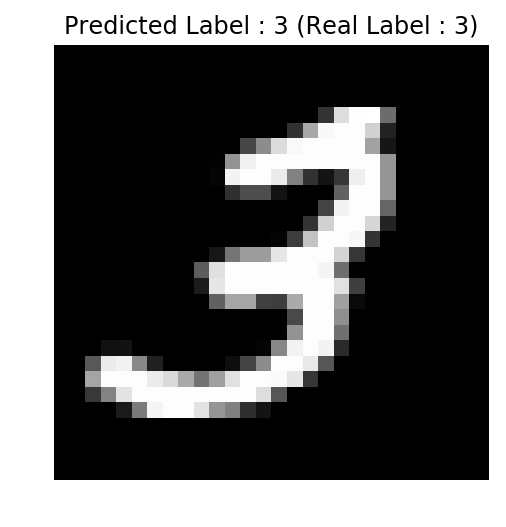

In [15]:
img = test_image.reshape(28,28)
label = np.argmax(test_label)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Predicted Label : {0} (Real Label : {1})".format(np.argmax(out), np.argmax(test_label)))
plt.show()

## SSE
이번엔 아래와 같은 loss function을 사용하여, SGD를 구현해보세요.

$$
E = \sum_{i=1}^m \sum_{k=1}^{10} |\hat{y_i^k}-y_i^k|^2
$$

In [16]:
features = mnist.train.images
labels = mnist.train.labels

x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

model = tf.nn.softmax(tf.matmul(x, W) + b)

y = tf.placeholder(tf.float32, [None, 10])

# TODO12
loss = tf.reduce_sum(tf.reduce_sum(tf.square(model - y),1))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(model,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

lr = 0.01
batch_size = 128
MaxEpochs = 5
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 50 == 0:
            curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 46633.086 0.347
0 50 9144.683 0.8969
0 100 8518.872 0.9036
0 150 7672.8584 0.9136
0 200 7315.8994 0.9189
0 250 6816.683 0.9234
0 300 7364.222 0.917
0 350 7085.0 0.9202
0 400 6744.78 0.9239

1 0 7068.2803 0.9186
1 50 6761.186 0.9225
1 100 6593.9087 0.9215
1 150 6391.003 0.9237
1 200 6186.796 0.9274
1 250 6505.3203 0.9226
1 300 6417.6675 0.9255
1 350 6221.9375 0.9283
1 400 6261.3823 0.9231

2 0 6628.9746 0.919
2 50 6205.1016 0.9263
2 100 6161.5566 0.9269
2 150 6652.372 0.9167
2 200 6164.6934 0.9255
2 250 6109.8945 0.9287
2 300 6100.0938 0.9251
2 350 6050.0283 0.9263
2 400 6547.4087 0.9193

3 0 6407.0557 0.9207
3 50 5857.097 0.9292
3 100 5734.2607 0.9299
3 150 5889.7373 0.9278
3 200 5892.6973 0.9281
3 250 5804.763 0.9284
3 300 6035.5947 0.9239
3 350 5771.3853 0.9304
3 400 5908.907 0.923

4 0 5562.008 0.9314
4 50 5671.708 0.9312
4 100 5689.3867 0.9273
4 150 6153.2793 0.9241
4 200 5588.9727 0.9283
4 250 5552.542 0.9277
4 300 5973.3423 0.9275
4 350 6077.2183 0.9235
4 400 5986.144 0.9265
